<div style="font-weight:bold;font-size:30px;margin-bottom:-5px">Labs Submission 4: Neural Nets</div>

*submitted by: Lixiao Hu, Moritz Raykowski and Robin Reiners*

---

<p style="font-weight: bold">Table of Content:</p>

* [Problem Definition 1: Network calculus](#network-calculus)
    * [1.1 Question](#1-1)
    * [1.2 Question](#1-2)
    * [1.3 Question](#1-3)
* [Problem Definition 2: Tensorflow and Keras](#tensorflow-and-keras)
    * [2.1 Question](#2-1)
    * [2.2 Question](#2-2)
    * [2.3 Question](#2-3)
    * [2.4 Question](#2-4)
    * [2.5 Question](#2-5)
    * [2.6 Question](#2-6)

---

*install required dependencies:*

In [1]:
import importlib

def import_or_install(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        import subprocess
        subprocess.check_call(['pip', 'install', package])
        print(f"{package} has been installed.")


libraries = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'tensorflow', 'keras', 'pydot']

for library in libraries:
    import_or_install(library)
    globals()[library] = importlib.import_module(library)

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from IPython.display import display, clear_output, HTML, Math
from matplotlib.ticker import PercentFormatter

# Display the plot centered within the cell
display(HTML("<style>.output { display: flex; justify-content: center; }</style>"))

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
tensorflow is already installed.
keras is already installed.
pydot is already installed.


<a id='network-calculus'></a> <p style="text-decoration: underline; font-style: italic; font-size:24px">Problem Definition: Network calculus</p>

Consider a very simple feed-forward network with a single hidden layer that has two units, just like in
the numerical example in the lecture notes. Let the coefficients be $\beta_{11}^{(1)}=0.5, \beta_{12}^{(1)}=2, \beta_{21}^{(1)}=1, \beta_{22}^{(1)}=0.5, \beta_1^{(2)}=2, \beta_1^{(2)}=1$, and we ignore constant terms, also just like in the lecture notes.
The code below computes the activation of unit 1 in the hidden layer.
```python
g1 = lambda z: max(0, z) # ReLu activation
beta_11_1 = 0.5
beta_21_1 = 1
a_1_1 = g1(beta_11_1*x1 + beta_21_1*x2)

```

<p style="text-decoration: underline" id='1-1'>Lab-Question 1.1:</p>

*What’s the activation for unit 2 in the hidden layer at $x_{1} = −7$ and $x_{2} = 5$, i.e. what’s $a_{2}^{(1)}(z_{2}^{(1)})$? Define that value as a_2_1.*

---

**Answer:** To calculate the activation a_2.1 for unit 2 in the hidden layer, we need to follow a similar process as for unit 1. We'll use the provided coefficients and input values x1 = -7 and x2 = 5.

In [2]:
g1 = lambda z: max(0, z)

beta_12_1 = 2
beta_22_1 = 0.5
x1 = -7
x2 = 5

z_2_1 = beta_12_1 * x1 + beta_22_1 * x2
a_2_1 = g1(z_2_1)

display(Math("$a_{2}^{(1)}(z_{2}^{(1)})=" + str(a_2_1) + "$"))

<IPython.core.display.Math object>

<p style="text-decoration: underline" id='1-2'>Lab-Question 1.2:</p>

*Write code to calculate the predicted output at $x_{1} = −7$ and $x_{2} = 5$ given the coefficient values above and using a linear activation function in the output layer, i.e. $g_{2}(z) = z$.*

---

**Answer:** To calculate the predicted output using the given coefficient values and a linear activation function $g_{2}(z) = z$ in the output layer, we can perform the following computations:

In [3]:
g2 = lambda z: z

beta_11_1 = 0.5
beta_12_1 = 2
beta_21_1 = 1
beta_22_1 = 0.5
beta_1_2 = 2
beta_2_2 = 1
x1 = -7
x2 = 5

# Hidden layer activations
z_1_1 = beta_11_1 * x1 + beta_21_1 * x2
a_1_1 = g1(z_1_1)

z_2_1 = beta_12_1 * x1 + beta_22_1 * x2
a_2_1 = g1(z_2_1)

# Output layer activation
z_1_2 = beta_1_2 * a_1_1 + beta_2_2 * a_2_1
a_1_2 = g2(z_1_2)

display(Math("$\hat{y}=" + str(a_1_2) + "$"))

<IPython.core.display.Math object>

<p style="text-decoration: underline" id='1-3'>Lab-Question 1.3:</p>

*How do your results change if you use leaky ReLU as activation function in the hidden layer with $α = 0.1$?*

---

**Answer:** In general, we do similar computations as before, but now we use the leaky ReLu as activation function g3 with $α = 0.1$ in the hidden layer, thus the values of ```a_1_1``` and ```a_2_1``` will be computed using the updated leaky_relu function. Note that in the last layer we still use linear activation similarly to before.

In [4]:
leaky_relu = lambda z, alpha: z if z >= 0 else alpha * z

beta_11_1 = 0.5
beta_12_1 = 2
beta_21_1 = 1
beta_22_1 = 0.5
beta_1_2 = 2
beta_2_2 = 1
x1 = -7
x2 = 5
alpha = 0.1

# Hidden layer activations
z_1_1 = beta_11_1 * x1 + beta_21_1 * x2
a_1_1 = leaky_relu(z_1_1, alpha)

z_2_1 = beta_12_1 * x1 + beta_22_1 * x2
a_2_1 = leaky_relu(z_2_1, alpha)

# Output layer activation
z_1_2 = beta_1_2 * a_1_1 + beta_2_2 * a_2_1
a_1_2 = g2(z_1_2)

display(Math("$\hat{y}_{LeakyReLu}=" + str(round(a_1_2,2)) + "$"))

<IPython.core.display.Math object>

<a id='tensorflow-and-keras'></a> <p style="text-decoration: underline; font-style: italic; font-size:24px">Problem Definition: Tensorflow and Keras</p>

In the following, you will build a neural network to predict apartment rents in Germany. Please download the dataset ```Lab4_Neural_Nets.csv```. The files contain apartment listings throughout Germany with the following variables: 
- **id** (a unique identifier for an apartment listing)
- **Rent** (monthly rent), 
- **livingspace** (apartment space in square meters) 
- **NoOfRooms** (number of rooms)
- **lat and lon** (latitude and longitude of the listing), 
- **distanceShop** (distance to nearest shopping center), 
- **various dummies** *for whether the apartment has a balcony, a kitchen or a garden, or whether the listing is made privately (rather than by a real estate agent), or whether the listing includes a floorplan*.

Import the keras and tensorflow library and set the seed to 42.
```python
import tensorflow as tf
from tensorflow import keras

random_seed = 42
```

<p style="text-decoration: underline" id='2-1'>Lab-Question 2.1:</p>

*Familiarize yourself with the data. Do features take different ranges of values?*

---

**Answer:** First of all, we observe that the features dum_balcony, dum_builtinkitchen, dum_floorplan, dum_garden and dum_privatoffer have binary values. The observations are ordered by increasing id number. The minimum and maximum values of the remaining features are listed in the Table below. We observe that the features actually do have different ranges of values. As a result, we conclude that the ranges of the values do actually differ. Therefore, we decide to normalize the data.

In [5]:
# Load the data
data = pd.read_csv("data\Lab4_Neural_Nets.csv")
data["id"] = data["id"].astype('category')

,count,mean,std,min,25%,50%,75%,max
Rent,39241.0,533.762793,328.341716,163.000000,310.000000,415.00000,650.000000,2135.000000
livingspace,39241.0,67.866994,23.547228,21.000000,52.799999,64.00000,79.629997,155.000000
NoOfRooms,39241.0,2.537485,0.882069,1.000000,2.000000,2.50000,3.000000,9.000000
lat,39241.0,51.320922,1.223049,47.444778,50.836239,51.32423,51.803322,54.933430
lon,39241.0,10.547340,2.489982,5.908390,8.105950,11.43240,12.520330,15.009500
distanceShop,39241.0,3.620615,2.506534,0.000080,1.526366,3.20470,5.344620,9.999823


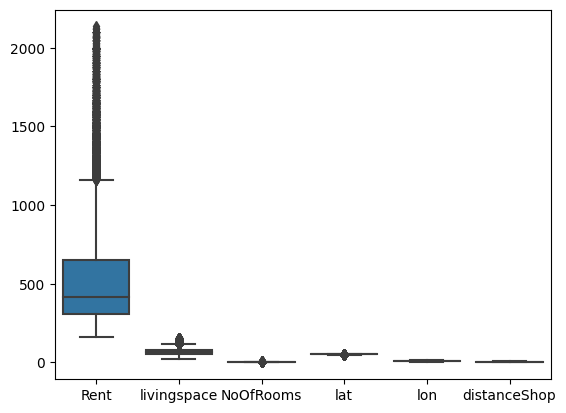

In [6]:
numeric_columns = ['Rent', 'livingspace', 'NoOfRooms', 'lat', 'lon', 'distanceShop']
sns.boxplot(data=data[numeric_columns])

data[numeric_columns].describe().T

,count,unique,top,freq
dum_balcony,39241,2,True,23755
dum_builtinkitchen,39241,2,False,28324
dum_floorplan,39241,2,True,20307
dum_garden,39241,2,False,32044
dum_privateoffer,39241,2,False,32516


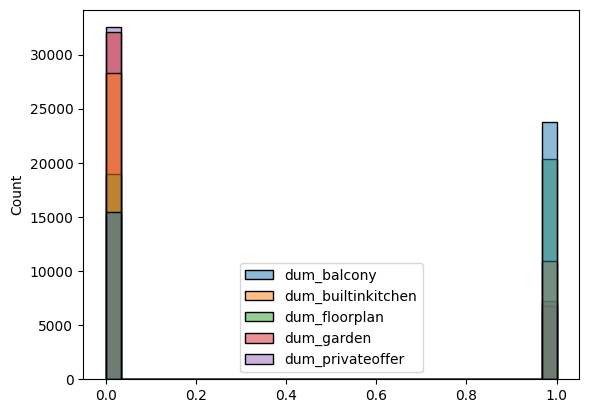

In [7]:
bool_columns = ["dum_balcony", "dum_builtinkitchen", "dum_floorplan", "dum_garden", "dum_privateoffer"]
sns.histplot(data=data[bool_columns])
data[bool_columns] = data[bool_columns].astype(bool)
data[bool_columns].describe().T

<p style="text-decoration: underline" id='2-2'>Lab-Question 2.2:</p>

*As a first step, build a neural network using keras with 3 hidden layers (32 units each and ”ReLu“ activation function). Output the model architecture to check how it looks like.*

---

**Answer:** First, we built the model, print the information of model and confirm that the model was built correctly. We have 3 hidden layers with 32 units each and "ReLu" as activation function.

In [8]:
# Define the model
model_1 = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(10,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1)
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras_visualizer import visualizer 

visualizer(model_1, file_format='png', view=True)

<img src="graph.png" width=750>

<p style="text-decoration: underline" id='2-3'>Lab-Question 2.3:</p>

*Split the data into two parts, a training, and a test set. The test set should comprise 5000 observations. Put the test set aside as you will use it later on. Now train the model using a 70/30 split into training and validation set (epochs = 100, batch_size=30) and plot the MSE in the validation set.*

---

**Answer:** We normalize the data in the training data set to overcome the different ranges (see [Lab-Question 2.1](#2-1)). We split the data in a training set data train and a test set data test such that the test set constains 5000 observations and train the model using a 70/30 split and plotted the loss values (which is measured by MSE) depending on the epoch

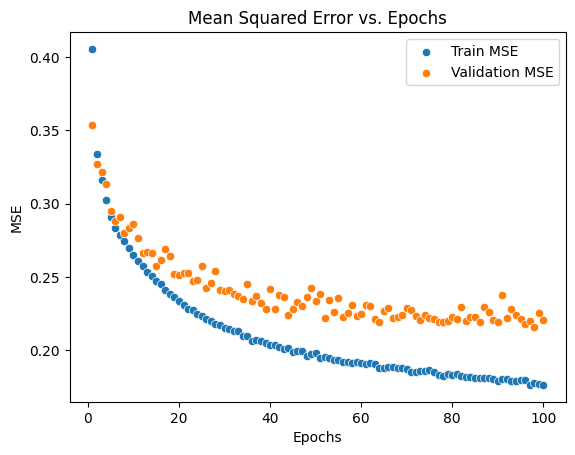

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training, validation, and test sets
test_size = 5000
val_size = int(0.3 * (len(data) - test_size))
train_size = len(data) - val_size - test_size

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42).drop(columns=["id"])

# Extracting the input features and target variable
x = data_shuffled.drop(columns=['Rent'])
y = data_shuffled['Rent']

# Normalize the input features
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x)

# Scale the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the normalized data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(
    x_scaled, y_scaled, 
    test_size=(val_size + test_size), 
    random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_val, y_val, 
    test_size=(test_size / (val_size + test_size)), 
    random_state=42
)

# Compiling the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history_mse = model_1.fit(
    x_train, y_train, 
    batch_size=30, epochs=100, 
    validation_data=(x_val, y_val), 
    verbose=1
)

# Creating a dataframe to store the MSE values
mse_df = pd.DataFrame({
    'Epochs': range(1, len(history_mse.history['loss']) + 1),
    'Train MSE': history_mse.history['loss'],
    'Validation MSE': history_mse.history['val_loss']
})

# Plotting the scatter plot
sns.scatterplot(data=mse_df, x='Epochs', y='Train MSE', label='Train MSE')
sns.scatterplot(data=mse_df, x='Epochs', y='Validation MSE', label='Validation MSE')
plt.title('Mean Squared Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

We can observe that the loss value for the training data consistently decreases as the number of epochs increases, particularly in the initial stages where the decrease is more pronounced. This can be attributed to the fact that the initial coefficients are relatively poor compared to the updated coefficients. On the other hand, the validation data shows a considerably lower loss value since it utilizes the updated coefficients rather than the initial ones. The loss values for the validation data also decrease, but they exhibit slightly more variability compared to the training data. Additionally, the decrease in loss values for the validation set is less pronounced than that of the training set, with the validation points appearing above the training data points.

<p style="text-decoration: underline" id='2-4'>Lab-Question 2.4:</p>

*For better interpretation, you also want to investigate the mean absolute error (MAE). Please write yourself a MAE measure using the keras backend functions and include it as metric during training (Hint: for this custom metric, set axis=0 for k_mean). How large is the MAE in the validation set after training?*

---

**Answer:** We first implement a costumized mean absolute error metric and included it in compile

In [41]:
import tensorflow.keras.backend as K

# Custom MAE metric
custom_mae = lambda y_true, y_pred: K.mean(K.abs(y_pred - y_true), axis=0)

model_2 = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(10,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1)
])

# Compiling the model with custom MAE metric
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_mae])

# Training the model
history_mae = model_2.fit(
    x_train, y_train, 
    batch_size=30, epochs=100, 
    validation_data=(x_val, y_val), 
    verbose=0
)

# Evaluating MAE in the validation set
mae = model_2.evaluate(x_val, y_val)[1]

print("MAE in the validation set:", mae)

321/321 [==============================] - 1s 3ms/step - loss: 0.2317 - <lambda>: 0.3136
MAE in the validation set: 0.31362244486808777


Next, we fit the model again from scratch, now named model_2, and plot the loss function values as well as the values of the customized MAE metric depending on the epoch number. It is important to note that we do not continue with the same model as before (named model_1) since we want to start training from scratch. The results can be found in the next Figure. The loss function values are, of course, similar to the ones in the previous task since we do not change anything regarding these. We only evaluate one more value in each step, which is the customized MAE. The MAE values decrease as well for the training and validation sets. Here, the values for the validation set are located above the training data values as well. Additionally, we observe that the values for the training data are less distributed than the values for the validation data. The MAE value of the validation data after 100 epochs is 0.3136.

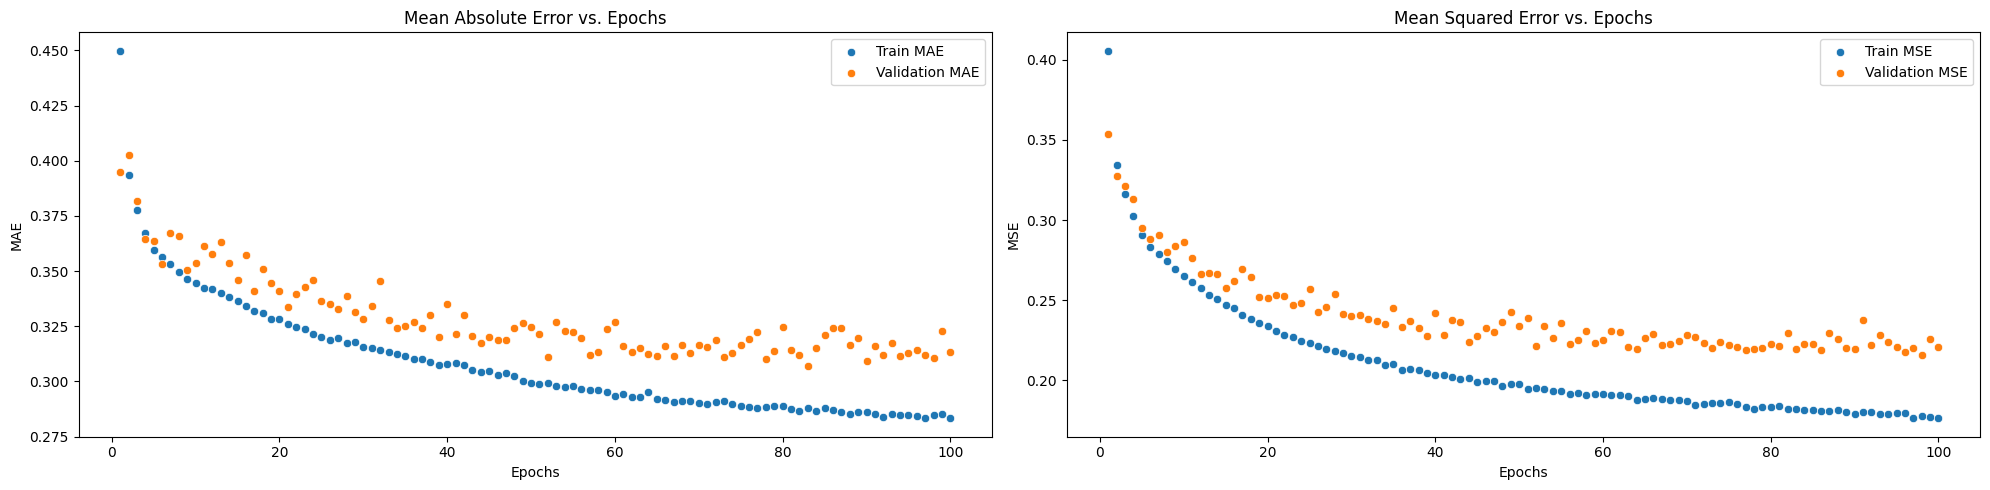

In [42]:
# Creating a dataframe to store the MSE and MAE values
mse_df = pd.DataFrame({
    'Epochs': range(1, len(history_mse.history['loss']) + 1),
    'Train MSE': history_mse.history['loss'],
    'Validation MSE': history_mse.history['val_loss'],
})

mae_df = pd.DataFrame({
    'Epochs': range(1, len(history_mae.history['loss']) + 1),
    'Train MAE': history_mae.history['<lambda>'],
    'Validation MAE': history_mae.history['val_<lambda>'],
})

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plotting MAE subplot
sns.scatterplot(
    data=mae_df, x='Epochs', y='Train MAE', label='Train MAE', ax=ax1
)
sns.scatterplot(
    data=mae_df, x='Epochs', y='Validation MAE', label='Validation MAE', ax=ax1
)
ax1.set_title('Mean Absolute Error vs. Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')

# Plotting MSE subplot
sns.scatterplot(
    data=mse_df, x='Epochs', y='Train MSE', label='Train MSE', ax=ax2
)
sns.scatterplot(
    data=mse_df, x='Epochs', y='Validation MSE', label='Validation MSE', ax=ax2
)
ax2.set_title('Mean Squared Error vs. Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the subplots
plt.show()

<p style="text-decoration: underline" id='2-5'>Lab-Question 2.5:</p>

*Now think more carefully about hyperparameters. Try the following values for the number of units in the hidden layers: hidden_layer1: {64, 32}, hidden_layer2: {64, 32} and compare the performance.*

---

**Answer:** We perform a grid search to find the best configuration of hidden layer units for a neural network model. It evaluates different combinations of hidden layer units specified in hidden_layer1_values and hidden_layer2_values lists. We then iterate over all combinations of these values and build, compile, and train the model for each combination. The best_mse variable keeps track of the best MSE found so far, and best_hidden_layers stores the corresponding best configuration. Finally, we print the best configuration and the best MSE achieved in the validation set.

In [63]:
hidden_layer1_values = [64, 32]
hidden_layer2_values = [64, 32]

best_mse = float('inf')
results = []

# Iterate over all combinations of hidden layer units
for hidden_layer1 in hidden_layer1_values:
    for hidden_layer2 in hidden_layer2_values:
        # Build the model
        model = keras.Sequential([
            layers.Dense(units=hidden_layer1, activation='relu', input_shape=(10,)),
            layers.Dense(units=hidden_layer2, activation='relu'),
            layers.Dense(units=32, activation='relu'),
            layers.Dense(units=1)
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_mae])

        # Train the model
        history = model.fit(
            x_train, y_train, 
            batch_size=30, epochs=100, 
            validation_data=(x_val, y_val), 
            verbose=0
        )

        # Evaluate MSE in the validation set
        val_mse, val_mae = model.evaluate(x_val, y_val)
        train_mse, train_mae = model.evaluate(x_train, y_train)

        # Check if current configuration performs better
        if val_mse < best_mse:
            best_mse = val_mse
            best_hidden_layers = (hidden_layer1, hidden_layer2)
            best_model = model

        # Save the results for this configuration
        results.append({
            'Hidden Layer 1': hidden_layer1,
            'Hidden Layer 2': hidden_layer2,
            'val_MSE': val_mse, 
            'val_MAE': val_mae,
            'train_MSE': train_mse,
            'train_MAE': train_mae
        })
        
pd.DataFrame(results).set_index(['Hidden Layer 1', 'Hidden Layer 2'])

750/750 [==============================] - 1s 1ms/step - loss: 0.1733 - <lambda>: 0.2787


val_MSE   val_MAE  train_MSE  train_MAE
Hidden Layer 1 Hidden Layer 2                                          
64             64              0.249006  0.317850   0.141053   0.252539
               32              0.238152  0.313884   0.164386   0.271055
32             64              0.233848  0.318756   0.153963   0.270947
               32              0.229750  0.311563   0.173312   0.278730

<p style="text-decoration: underline" id='2-6'>Lab-Question 2.6:</p>

*Choose the best model and evaluate it on the test set. What is the estimated generalization error of your final model?*

---

**Answer:** We decide that our best model is the one, that has the lowest mse on the validation set, as the mse is the metric that we optimize for. In out setting the best model is the configuration (32,32) as it has the lowest MSE and additionally the lowest MAE in the validation set.

In [64]:
# Print the best configuration and MAE
print("Best Hidden Layers Configuration:", best_hidden_layers)
print("Best MSE in the validation set:", best_mse)

Best Hidden Layers Configuration: (32, 32)
Best MSE in the validation set: 0.22975043952465057


In [65]:
best_model.evaluate(x_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2311 - <lambda>: 0.3115


[0.2310580015182495, 0.31146255135536194]

the estimated generalization error of our model is 0.2311 (MSE) 